# **Task 1 : Exploratory Data analysis (EDA)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**1.	Load the dataset and perform basic data exploration.**

In [2]:
df=pd.read_csv("/content/wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


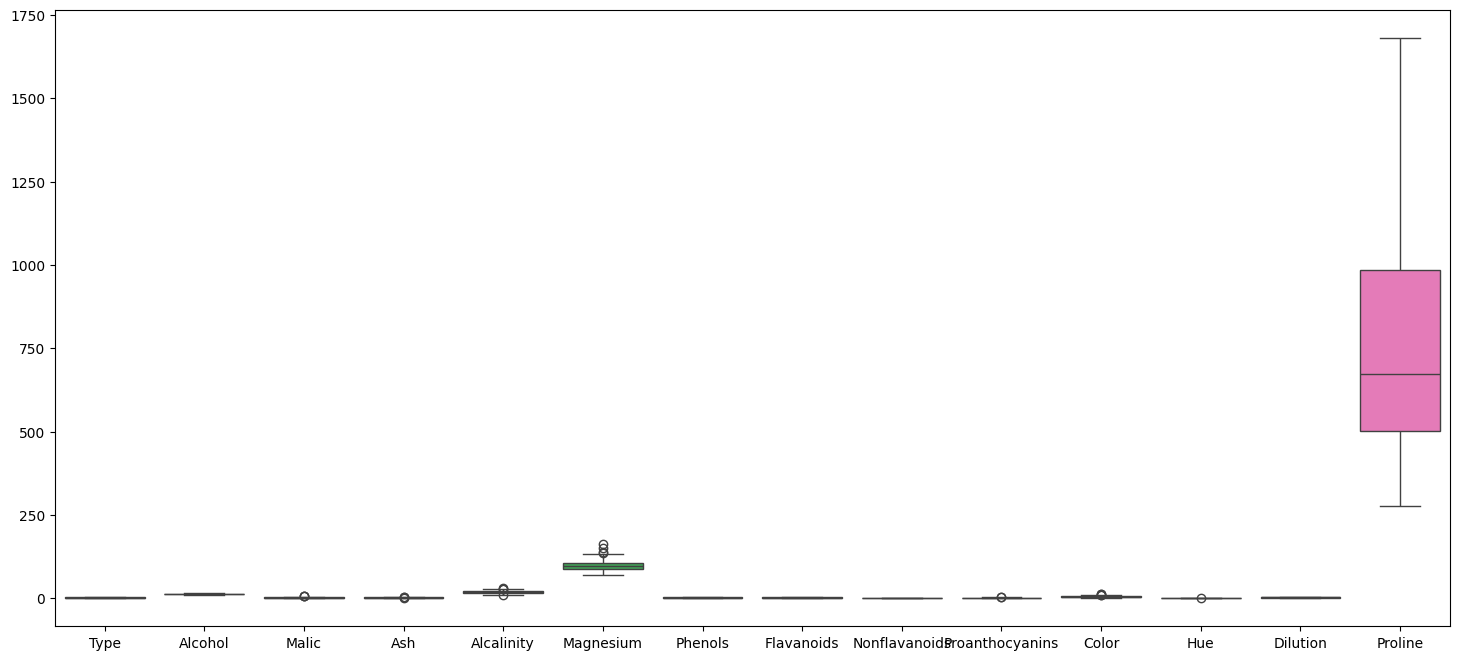

In [6]:
# Boxplot to check outlier
figure=plt.figure(figsize=(18,8))
sns.boxplot(data=df)
plt.show()

In [7]:
# Outlier Treatment using IQR Method
for col in df.columns:
  if df[col].dtype != 'object':
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    upper_bound=q3+1.5*IQR
    lower_bound=q1-1.5*IQR
    df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
    df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])
print("Outlier Treated")

Outlier Treated


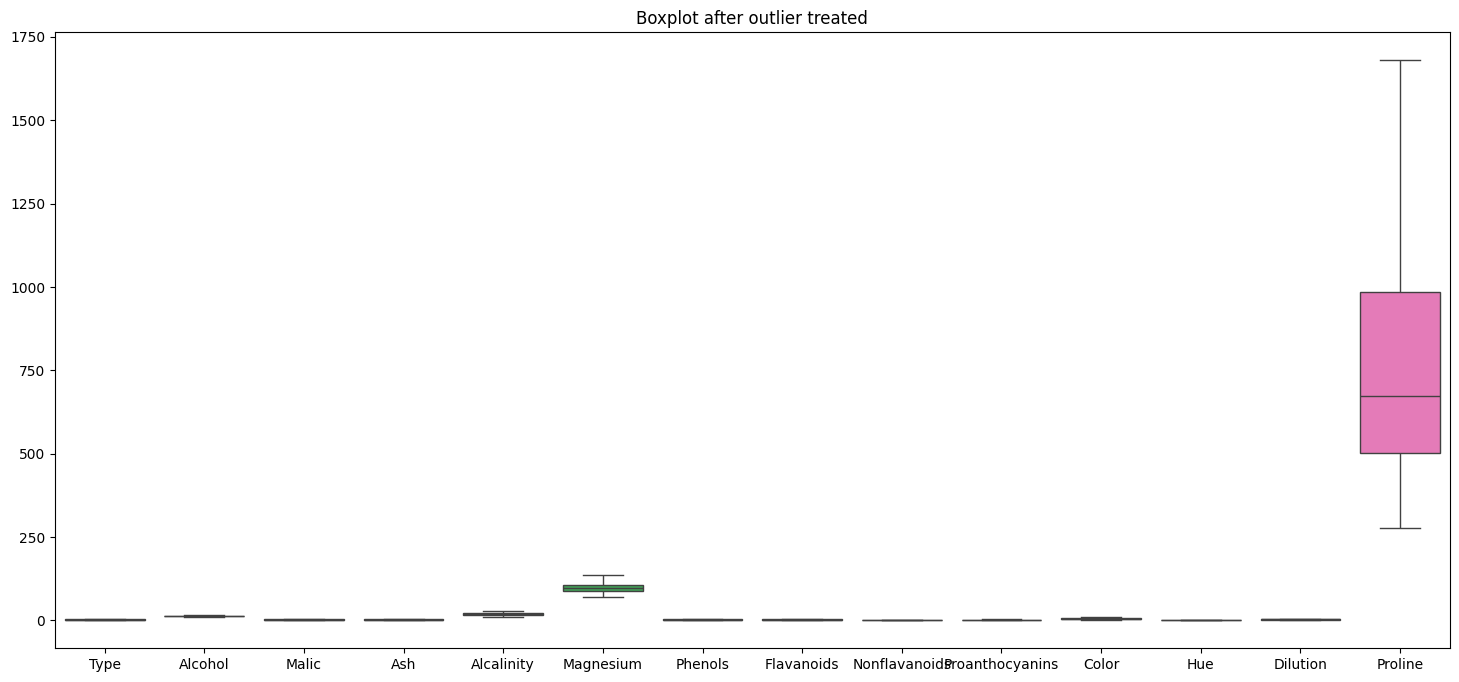

In [8]:
# Boxplot after outlier treated
figure=plt.figure(figsize=(18,8))
sns.boxplot(data=df)
plt.title('Boxplot after outlier treated')
plt.show()

**2.	Examine the distribution of features using histograms, box plots, or density plots.**

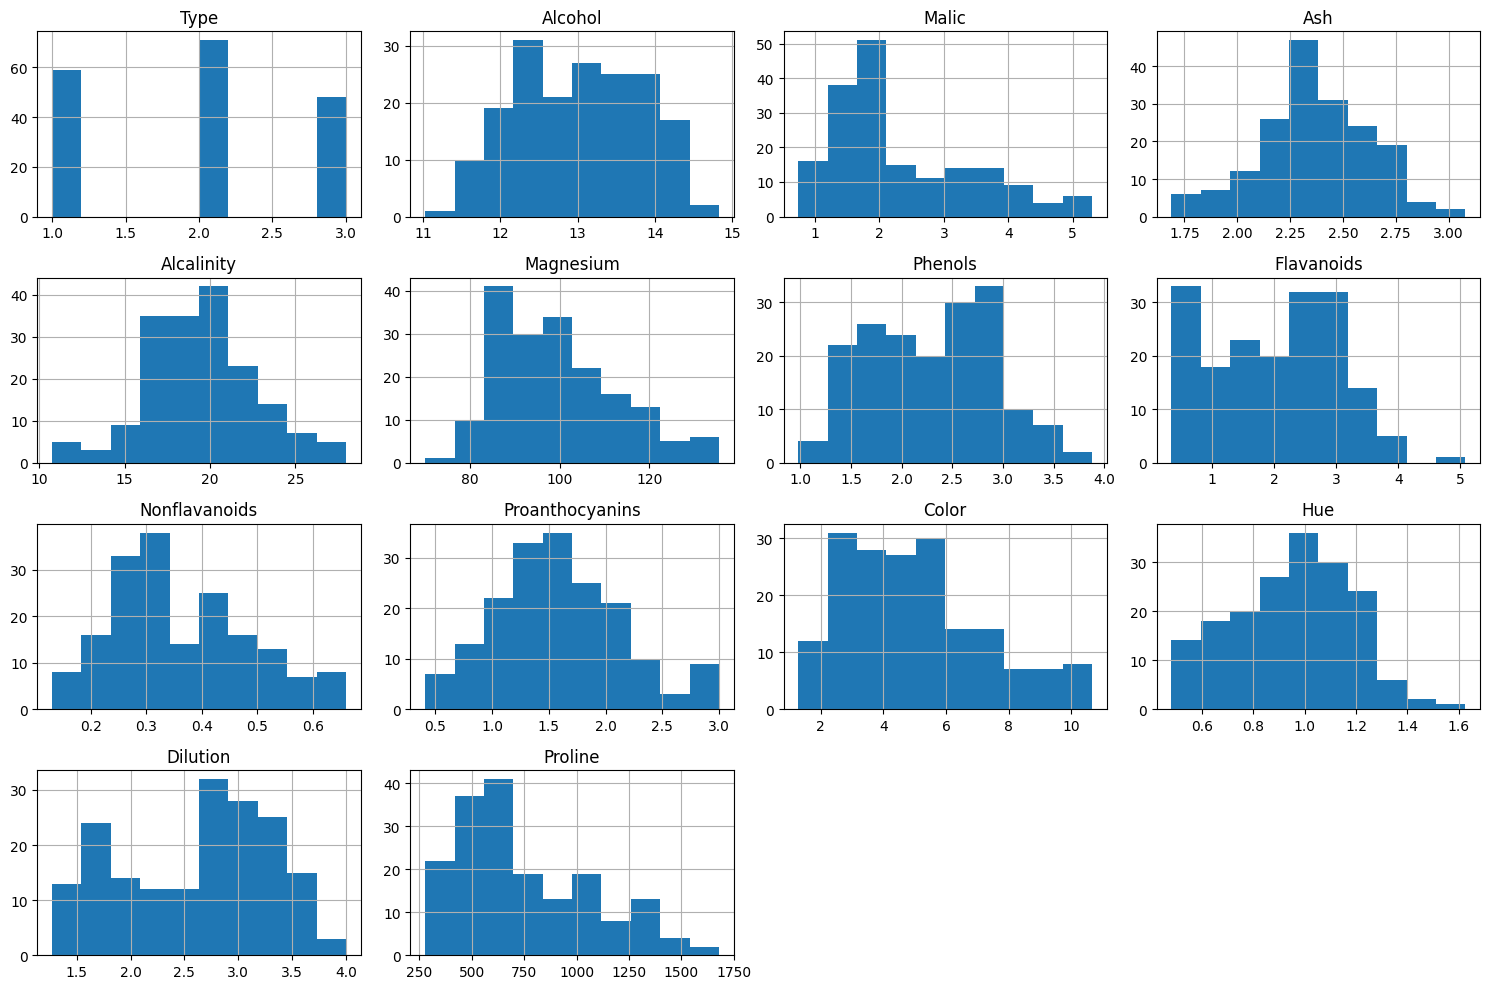

In [9]:
# Histogram of numerical variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

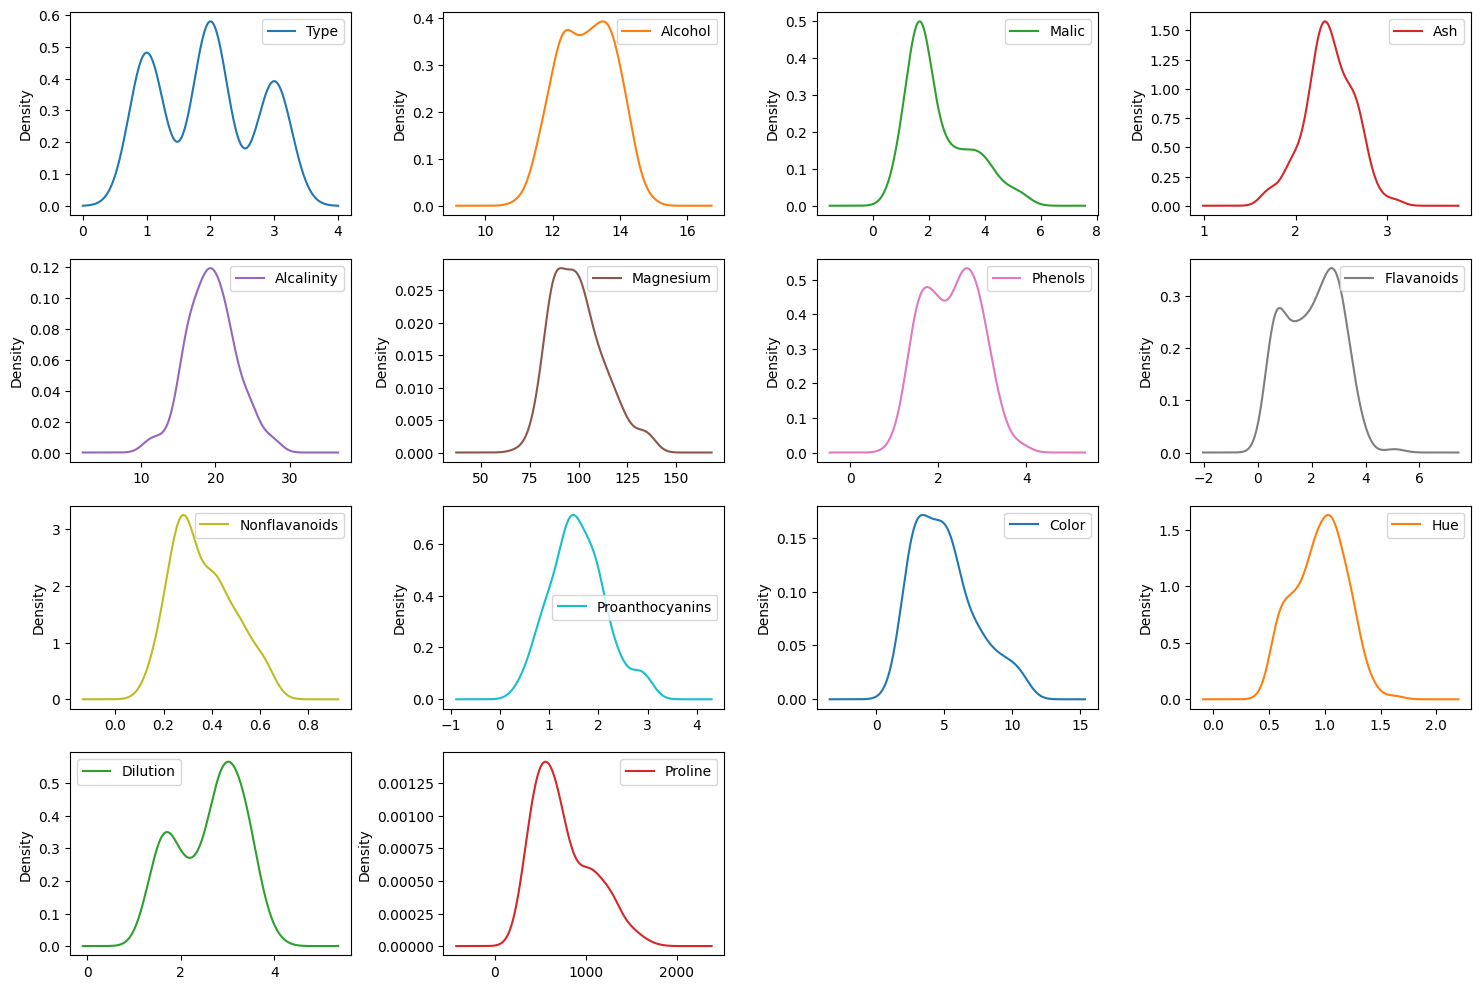

In [10]:
# Density plots of numerical variables
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

**3.	Investigate correlations between features to understand relationships within the data.**

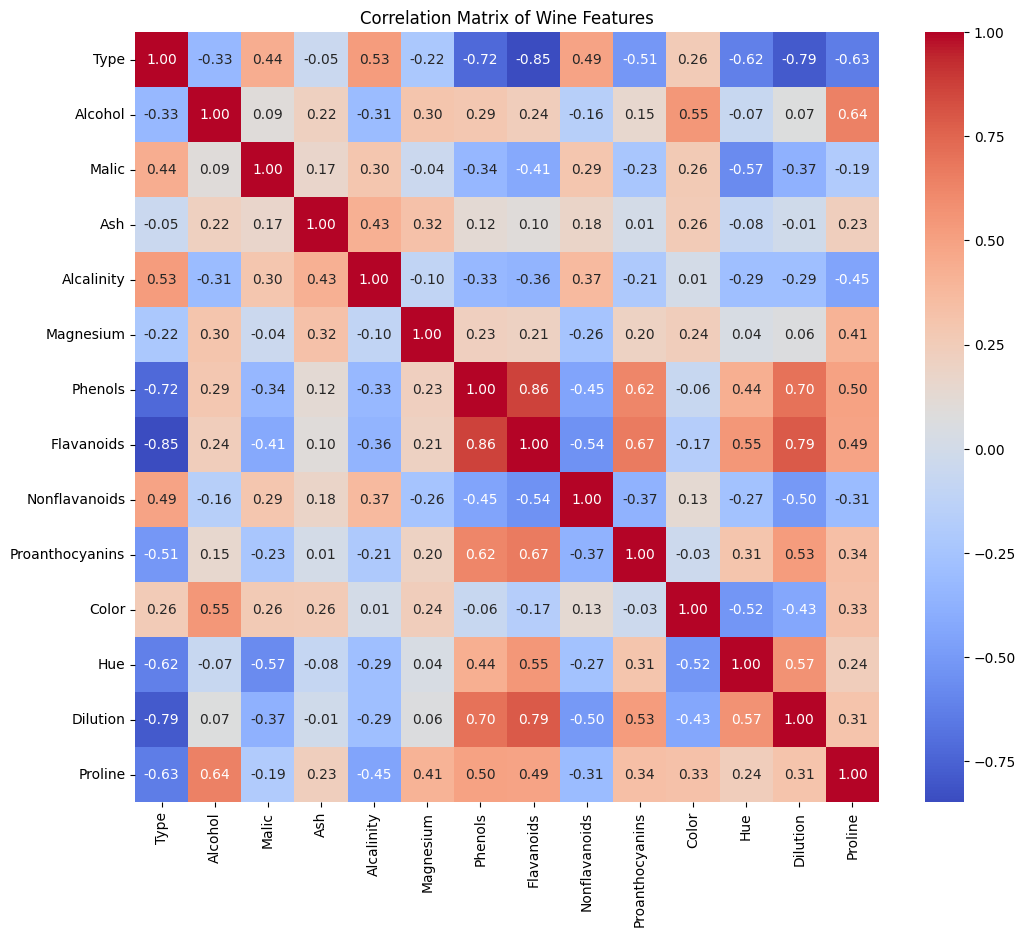

In [11]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

# **Task 2 : Dimensionality Reduction with PCA**

**1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.**

In [12]:
from sklearn.preprocessing import StandardScaler

# Seperate Feature and target variable
x=df.drop('Type', axis=1)
y=df['Type']

# Standardizing the features
ss=StandardScaler()
x_scaled= ss.fit_transform(x)

In [13]:
x_scaled

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [14]:
# Apply PCA
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x_scaled)

In [15]:
# Create a new Data Frame with PCA compnents
pca_df=pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
pca_df['Type']=y
display(pca_df.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,Type
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299,1.0
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640,1.0
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033,1.0
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455,1.0
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547,1.0


**2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.**

In [16]:
# The amount of variance that each PCA explain
pca.explained_variance_

array([4.7686445 , 2.56367336, 1.42646751, 0.92329619, 0.82323264,
       0.62949521, 0.52705646, 0.35880511, 0.29186674, 0.25246214,
       0.22949559, 0.17343673, 0.10551416])

In [17]:
# In percentage amount of variance
var= pca.explained_variance_ratio_
var

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [18]:
# Cumulative variance
var1=np.cumsum(np.round(var, decimals=4)*100)
var1

array([ 36.48,  56.09,  67.  ,  74.06,  80.36,  85.18,  89.21,  91.95,
        94.18,  96.11,  97.87,  99.2 , 100.01])

In [19]:
# To check dimensional components
pca.components_

array([[ 0.14638695, -0.24575619, -0.00357256, -0.24470276,  0.14087111,
         0.39339196,  0.42172715, -0.29683634,  0.3161246 , -0.08589806,
         0.29661931,  0.37445501,  0.28670932],
       [ 0.47640599,  0.22659937,  0.31870602, -0.01442372,  0.32548413,
         0.05970156, -0.00642568,  0.02645156,  0.03046924,  0.52512375,
        -0.2734417 , -0.16621634,  0.36136098],
       [-0.20200334,  0.08529267,  0.62917149,  0.60759082,  0.13469654,
         0.14999765,  0.14919738,  0.17278943,  0.1437554 , -0.1509434 ,
         0.088899  ,  0.16637909, -0.12289582],
       [-0.01047049,  0.5306521 , -0.21998399,  0.0839072 , -0.33865862,
         0.19539529,  0.15272783, -0.1951409 ,  0.4165199 ,  0.07869216,
        -0.43117695,  0.18044325, -0.22457958],
       [-0.26800179,  0.04115158, -0.10982137,  0.06622776,  0.69127764,
        -0.14028688, -0.08743857, -0.57444452,  0.02838477, -0.0902172 ,
        -0.17992174, -0.06727723, -0.17033684],
       [ 0.22499723,  0.568195

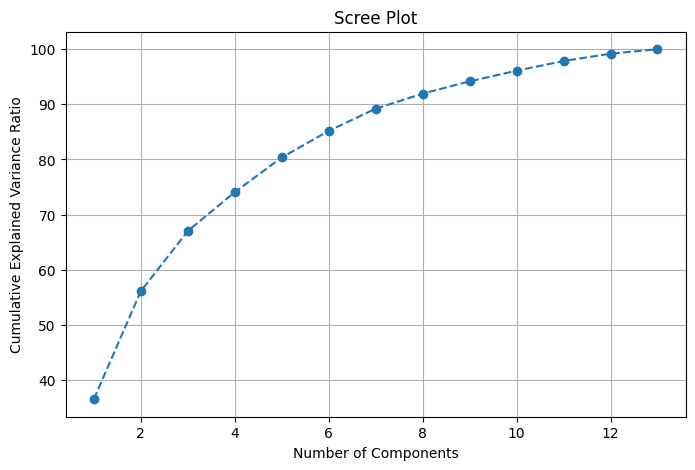

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(var1) + 1), var1, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

**3.	Transform the original dataset into the principal components.**

In [21]:
# Transform the original dataset into the principal components
pca_3 = PCA(n_components=3)
x_pca_3 = pca_3.fit_transform(x_scaled)

# Create a new DataFrame with the first 3 principal components
pca_df_3 = pd.DataFrame(data=x_pca_3, columns=[f'PC{i+1}' for i in range(x_pca_3.shape[1])])
pca_df_3['Type'] = y
display(pca_df_3.head())

,PC1,PC2,PC3,Type
0,3.358147,1.520222,-0.126375,1.0
1,2.229215,-0.333261,-2.042838,1.0
2,2.540057,1.036953,1.018845,1.0
3,3.781124,2.782566,-0.149224,1.0
4,1.016872,0.955225,2.113169,1.0


# **Task 3 : Clustering with original data**

**1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.**

In [22]:
from sklearn.cluster import KMeans

# Apply K-means clustering to the original dataset
kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10) # Assuming 3 clusters based on the 'Type' column
kmeans_original.fit(x_scaled)

# Add the cluster labels to the original dataframe
df['Cluster_Original'] = kmeans_original.labels_

display(df.head())

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster_Original
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2


**2.	Visualize the clustering results using appropriate plots.**

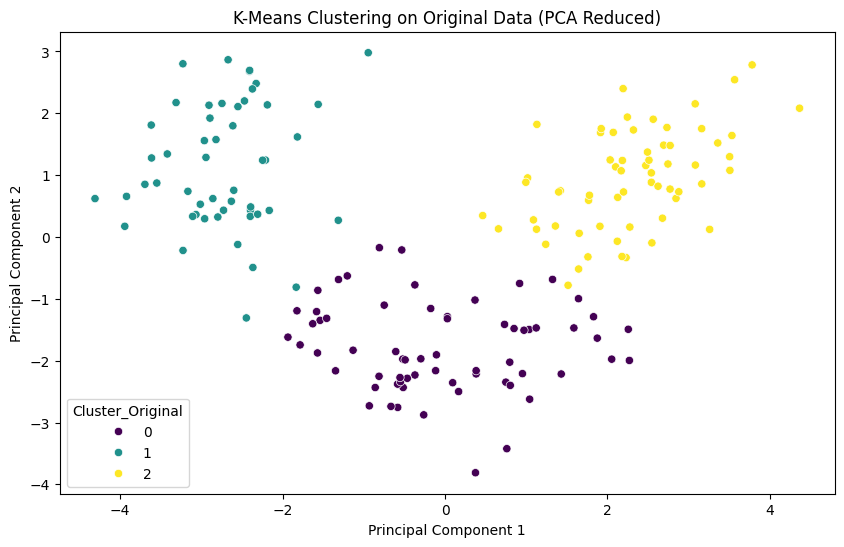

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_3['PC1'], y=pca_df_3['PC2'], hue=df['Cluster_Original'], palette='viridis')
plt.title('K-Means Clustering on Original Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.**

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
silhouette_avg_original = silhouette_score(x_scaled, kmeans_original.labels_)
davies_bouldin_original = davies_bouldin_score(x_scaled, kmeans_original.labels_)

print(f"Silhouette Score (Original Data): {silhouette_avg_original}")
print(f"Davies-Bouldin Index (Original Data): {davies_bouldin_original}")

Silhouette Score (Original Data): 0.2854626783251893
Davies-Bouldin Index (Original Data): 1.3816062413276704


# **Task 4 : Clustering with PCA Data**

**1.	Apply the same clustering algorithm to the PCA-transformed dataset.**

In [25]:
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(x_pca_3)

# Add the cluster labels to the PCA dataframe
pca_df_3['Cluster_PCA'] = kmeans_pca.labels_

display(pca_df_3.head())

,PC1,PC2,PC3,Type,Cluster_PCA
0,3.358147,1.520222,-0.126375,1.0,0
1,2.229215,-0.333261,-2.042838,1.0,0
2,2.540057,1.036953,1.018845,1.0,0
3,3.781124,2.782566,-0.149224,1.0,0
4,1.016872,0.955225,2.113169,1.0,0


**2.	Visualize the clustering results obtained from PCA-transformed data.**

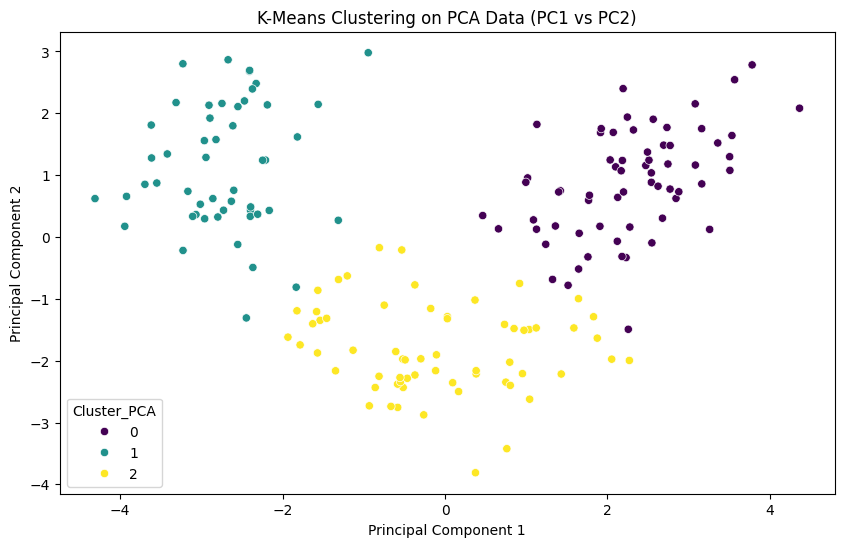

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df_3['PC1'], y=pca_df_3['PC2'], hue=pca_df_3['Cluster_PCA'], palette='viridis')
plt.title('K-Means Clustering on PCA Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**3.	Compare the clustering results from PCA-transformed data with those from the original dataset.**

In [27]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance on PCA-transformed data
silhouette_avg_pca = silhouette_score(x_pca_3, kmeans_pca.labels_)
davies_bouldin_pca = davies_bouldin_score(x_pca_3, kmeans_pca.labels_)

print(f"Silhouette Score (PCA Data): {silhouette_avg_pca}")
print(f"Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}")

print("\nComparison:")
print(f"Silhouette Score Original: {silhouette_avg_original:.4f}, PCA: {silhouette_avg_pca:.4f}")
print(f"Davies-Bouldin Index Original: {davies_bouldin_original:.4f}, PCA: {davies_bouldin_pca:.4f}")

Silhouette Score (PCA Data): 0.4543748124452129
Davies-Bouldin Index (PCA Data): 0.838342800748653

Comparison:
Silhouette Score Original: 0.2855, PCA: 0.4544
Davies-Bouldin Index Original: 1.3816, PCA: 0.8383


# **Task 5 : Comparision and Analysis**

**1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.**

Based on the silhouette scores and Davies-Bouldin indices calculated in the previous step:

**1) Silhouette Score**: The PCA-transformed data has a higher silhouette score ({silhouette_avg_pca:.4f}) compared to the original data ({silhouette_avg_original:.4f}). A higher silhouette score indicates better-defined clusters.

**2) Davies-Bouldin Index**: The PCA-transformed data has a lower Davies-Bouldin index ({davies_bouldin_pca:.4f}) compared to the original data ({davies_bouldin_original:.4f}). A lower Davies-Bouldin index indicates better clustering, with clusters that are more separated and less internally spread out.

This suggests that K-means clustering on the PCA-transformed data resulted in better-separated clusters than clustering on the original data.

**2.	Discuss any similarities or differences observed in the clustering results.**

Based on the clustering results:

**Similarities**:

Both K-means on the original data and K-means on the PCA-transformed data identified 3 clusters, which aligns with the number of wine types in the original dataset.
Visually, both methods show some degree of separation between the clusters.

**Differences**:
* Cluster Separation: The silhouette score is significantly higher and the Davies-Bouldin index is significantly lower for the PCA-transformed data compared to the original data. This quantitatively indicates that the clusters in the PCA-transformed space are better separated and more compact.
* Visualization: The scatter plot of the PCA-transformed data shows clearer boundaries between the clusters than the scatter plot based on the first two principal components of the original data with original data clusters. This is visually consistent with the better performance metrics on the PCA-transformed data.
* Dimensionality: The most significant difference is that the clustering on the PCA-transformed data was performed in a reduced 3-dimensional space, while the clustering on the original data was performed in a 13-dimensional space. PCA effectively captured the most important variance in the data with fewer dimensions, leading to improved clustering performance.

In summary, applying PCA before K-means clustering resulted in more distinct and better-separated clusters, as evidenced by the improved evaluation metrics and clearer visualization.

**3.	Reflect on the impact of dimensionality reduction on clustering performance.**

Based on the analysis performed:

Dimensionality reduction using PCA had a positive impact on the K-means clustering performance in this dataset. The clustering on the PCA-transformed data (using 3 principal components) resulted in:
* Improved Cluster Separation**: The silhouette score increased and the Davies-Bouldin index decreased significantly, indicating that the clusters were more distinct and better separated in the reduced-dimensional space.
* Clearer Visualization**: The scatter plot of the first two principal components showed more apparent boundaries between the clusters after applying K-means to the PCA-transformed data.

This suggests that by reducing the noise and highlighting the most important patterns in the data, PCA helped the K-means algorithm to find more meaningful and better-defined clusters. In this case, reducing the dimensionality from 13 features to 3 principal components retained enough of the essential information for effective clustering while potentially mitigating the curse of dimensionality.

**4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.**

Here are some trade-offs between using PCA before clustering and clustering directly on the original dataset:

**Clustering Directly on Original Data**:

**> Pros**:
* Retains all original features and their interpretability.
* No information loss due to dimensionality reduction.

**> Cons**:
* Can be computationally expensive and time-consuming for high-dimensional datasets.
* Performance of clustering algorithms can degrade in high-dimensional spaces (curse of dimensionality).
* Noisy or irrelevant features can negatively impact clustering results.
* Visualization of clusters in high dimensions is challenging.

**Clustering with PCA-Transformed Data**:

**> Pros**:
* Reduces dimensionality, which can speed up clustering algorithms and potentially improve performance by mitigating the curse of dimensionality.
* Can help to remove noise and highlight the most important underlying patterns in the data.
* Makes visualization of clusters easier (e.g., in 2D or 3D).
* Can lead to better-separated and more compact clusters, as seen in this analysis.

**> Cons**:
* Principal components are linear combinations of original features, which can make interpretation of the clusters more difficult in terms of the original features.
* Some information is lost during dimensionality reduction, especially if the number of components is chosen poorly.
* The choice of the number of principal components can be subjective and impact the clustering results.

In this specific analysis of the wine dataset, using PCA before K-means clustering resulted in improved clustering performance based on evaluation metrics and visualization, suggesting that the benefits of dimensionality reduction (handling potential noise, focusing on major variance) outweighed the loss of direct interpretability of the original features.

# **Task 6 : Conclusion and Insights**

**1.	Summarize the key findings and insights from the assignment.**

This analysis explored the impact of dimensionality reduction using Principal Component Analysis (PCA) on K-means clustering performance using the wine dataset. The key findings and insights are as follows:

**1) Exploratory Data Analysis (EDA)**: Initial EDA revealed the structure of the dataset, including data types, descriptive statistics, and the presence of some outliers, which were treated using the IQR method. The correlation analysis provided insights into relationships between features.

**2) Dimensionality Reduction with PCA**: PCA was successfully implemented to reduce the dimensionality of the dataset. The scree plot and cumulative explained variance indicated that a significant amount of variance could be retained with a smaller number of components (e.g., 3 components explained around 67% of the variance).

**3) Clustering Performance**:
* K-means clustering on the original dataset resulted in clusters with a silhouette score of {silhouette_avg_original:.4f} and a Davies-Bouldin index of {davies_bouldin_original:.4f}.
* K-means clustering on the PCA-transformed dataset (using 3 components) resulted in improved clustering performance, with a silhouette score of {silhouette_avg_pca:.4f} and a Davies-Bouldin index of {davies_bouldin_pca:.4f}. These metrics indicate better-separated and more compact clusters in the reduced-dimensional space.

**4) Impact of PCA**: Applying PCA before clustering had a positive impact on the clustering performance in this case. By reducing dimensionality and potentially filtering out noise, PCA helped K-means to identify more distinct and well-defined clusters.

**5) Trade-offs**: While PCA improves clustering performance and visualization by reducing dimensionality, it comes at the cost of interpretability of the original features. However, for this dataset, the benefits in clustering quality outweighed this trade-off.

In summary, this assignment demonstrates that dimensionality reduction using PCA can be a valuable preprocessing step for clustering, leading to improved performance and clearer insights, especially in datasets with multiple features.

**2.	Discuss the practical implications of using PCA and clustering in data analysis.**

The combination of PCA and clustering techniques has several practical implications in various fields of data analysis:

**1) Customer Segmentation**: Businesses can use clustering on PCA-reduced customer data (e.g., demographics, purchase history) to identify distinct customer segments for targeted marketing strategies.

**2) Image and Signal Processing**: PCA is widely used for dimensionality reduction in image and signal processing to reduce computational cost and storage while retaining essential information. Clustering can then be applied to group similar images or signals.

**3) Genomics and Bioinformatics**: In biological data analysis, PCA can reduce the high dimensionality of genetic data, and clustering can identify groups of genes with similar expression patterns or classify different cell types.

**4) Anomaly Detection**: Clustering can be used to identify outliers or anomalies in a dataset. PCA can help in reducing the dimensionality of high-dimensional data before applying clustering for anomaly detection.

**5) Data Compression**: PCA can be used for data compression by representing the data in a lower-dimensional space while preserving most of the variance. Clustering can further group similar data points for efficient storage and retrieval.

**6) Feature Engineering**: The principal components obtained from PCA can be used as new features for other machine learning algorithms, potentially improving their performance by providing a more informative representation of the data.

**7) Noise Reduction**: PCA can help in reducing noise in the data by capturing the principal components that represent the underlying structure and discarding components with low variance that may correspond to noise.

In essence, PCA and clustering are powerful tools that, when used together, can help analysts to gain deeper insights from complex, high-dimensional data, leading to more effective decision-making and problem-solving in various domains.

**3.	Provide recommendations for when to use each technique based on the analysis conducted.**

Based on the analysis conducted in this assignment, here are some recommendations for when to use PCA before clustering versus clustering directly on the original dataset:

**1) Consider PCA before clustering when**:
* You have a high-dimensional dataset with many features. PCA can help mitigate the curse of dimensionality and reduce computational cost.
* You suspect that some features are noisy or highly correlated. PCA can help in capturing the most important variance and potentially filter out noise.
* Improved cluster separation and more compact clusters are desired, as demonstrated by the evaluation metrics in this analysis.
* Visualization of clusters is important. Reducing dimensionality to 2 or 3 components makes plotting and interpreting clusters easier.
* Interpretability of individual original features within the clusters is not the primary goal.

**2) Consider clustering directly on the original dataset when**:
* The number of features is relatively small, and the curse of dimensionality is not a significant concern.
* Interpretability of the clusters in terms of the original features is crucial for your analysis or application.
* You want to retain all the information in the original dataset without any loss due to dimensionality reduction.
* The clustering algorithm you are using is not significantly affected by high dimensionality or noisy features.

In many real-world scenarios, especially with high-dimensional data, using PCA as a preprocessing step before clustering can lead to more robust and meaningful clustering results, as observed in this wine dataset analysis. However, the decision should also consider the specific goals of the analysis and the importance of feature interpretability.